In [2]:
# 필요한 package 불러오기
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick
import matplotlib.axis as ax
import statistics

In [3]:
!git clone https://github.com/yun-seon/DX-Training-Hyundai-0707.git

Cloning into 'DX-Training-Hyundai-0707'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 21 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (21/21), done.


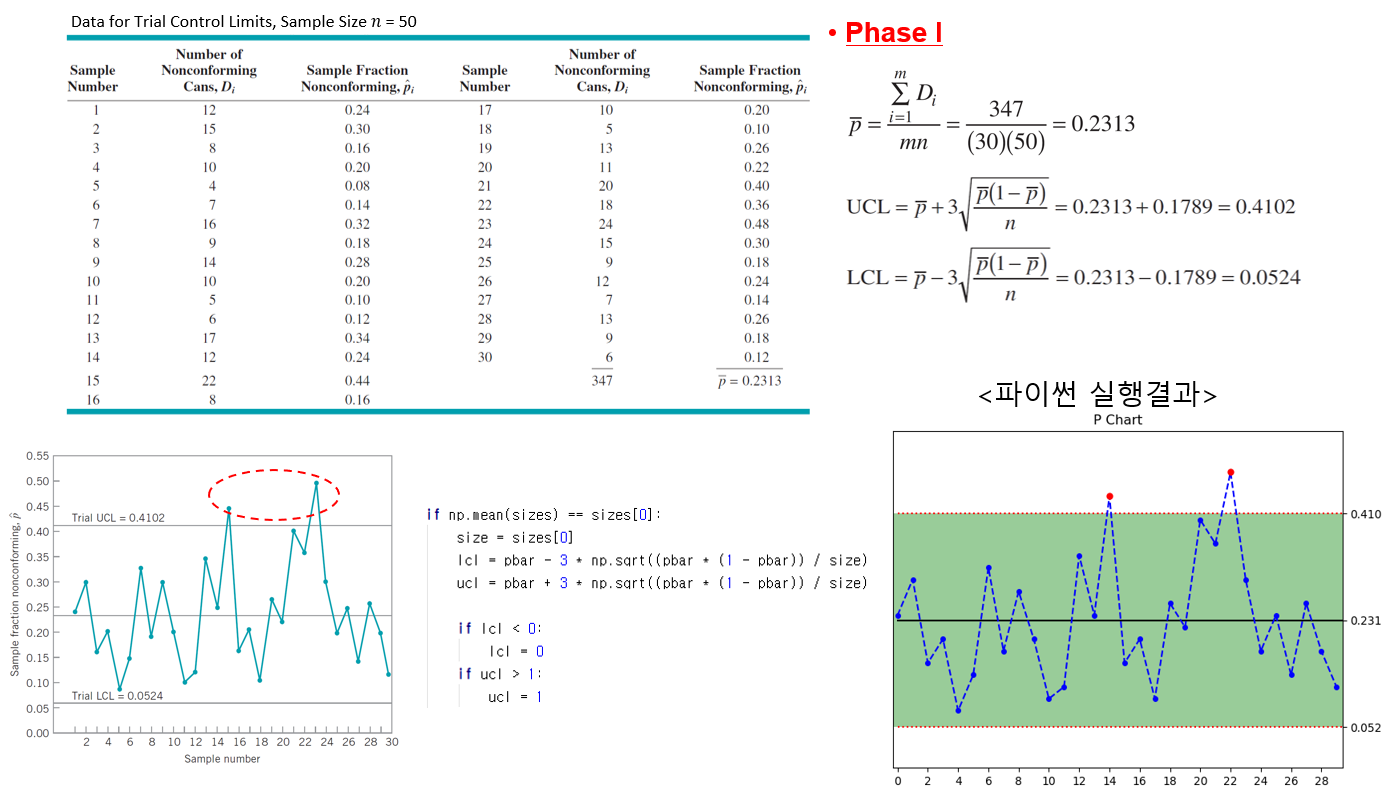

## (1) Example Data 활용하여 "p chart" 구축

In [4]:
# data 불러오기

ex = pd.read_csv("/content/DX-Training-Hyundai-0707/Data/example_p_chart.csv")
data = ex   
data.head()

,sample,value
0,50,12
1,50,15
2,50,8
3,50,10
4,50,4


In [5]:
# dataframe 형태를 변환

if isinstance(data, pd.DataFrame):
    data = data.values
data[:6]

array([[50, 12],
       [50, 15],
       [50,  8],
       [50, 10],
       [50,  4],
       [50,  7]])

In [6]:
# p chart 구성을 위한 setting 값 설정

title_ = "p chart"
plt.style.use('grayscale')
mpl.rcParams['lines.markersize'] = 4

size = len(data[0]) 
layers = []
points = None
summary = []
size = size-1

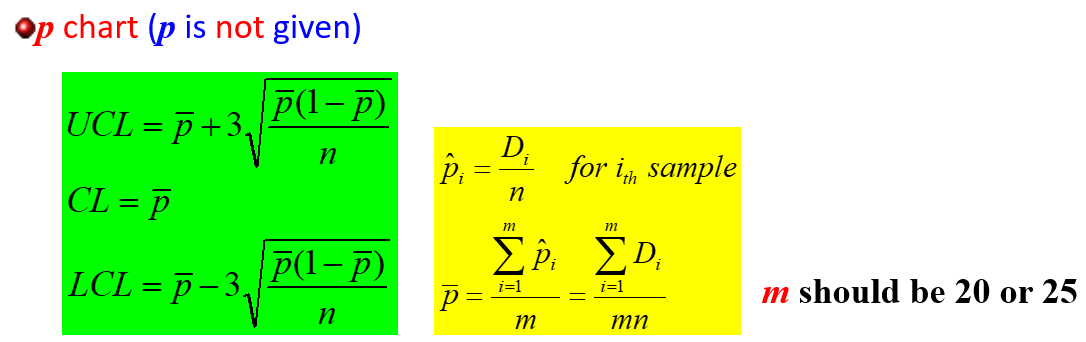

In [7]:
# Control Chart plotting 함수

def plot(data, size, newdata=None):

    data = data.T

    data2 = data / sizes
    pbar = np.mean(data2)

    if np.mean(sizes) == sizes[0]:                              
        size = sizes[0]
        lcl = pbar - 3 * np.sqrt((pbar * (1 - pbar)) / size) # Lower control limit
        ucl = pbar + 3 * np.sqrt((pbar * (1 - pbar)) / size) # Upper control limit

        if lcl < 0:
            lcl = 0
        if ucl > 1:
            ucl = 1

    return (data2, pbar, lcl, ucl, title_)

In [8]:
# 데이터 값 구분에 따른 빈도수로 표현

size = size - 1
sizes, data = data.T

print("size: \n", sizes)
print("data: \n", data)

size: 
 [50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50
 50 50 50 50 50 50]
data: 
 [12 15  8 10  4  7 16  9 14 10  5  6 17 12 22  8 10  5 13 11 20 18 24 15
  9 12  7 13  9  6]


In [9]:
# 데이터를 비율(=값/빈도수)로 표현

data2 = data / sizes
pbar = np.mean(data2)

print("prob data: \n", data2)
print("pbar: ", pbar)
print("mean of sizes: ", np.mean(sizes))

prob data: 
 [0.24 0.3  0.16 0.2  0.08 0.14 0.32 0.18 0.28 0.2  0.1  0.12 0.34 0.24
 0.44 0.16 0.2  0.1  0.26 0.22 0.4  0.36 0.48 0.3  0.18 0.24 0.14 0.26
 0.18 0.12]
pbar:  0.2313333333333333
mean of sizes:  50.0


In [10]:
size = sizes[0]
lcl = pbar - 3 * np.sqrt((pbar * (1 - pbar)) / size)
ucl = pbar + 3 * np.sqrt((pbar * (1 - pbar)) / size)

if lcl < 0:
    lcl = 0
if ucl > 1:
    ucl = 1

print("size: ", size)
print("Lower control limit (LCL): ", lcl)
print("Upper control limit (UCL): ", ucl)

size:  50
Lower control limit (LCL):  0.052427548071928204
Upper control limit (UCL):  0.4102391185947384


In [11]:
# 상기 과정을 plot 함수 통해 적용

result= plot(data, size, newdata=None)
data2 = result[0]
pbar = result[1]
lcl = result[2]
ucl = result[3]
title = _title = result[4]

print("prob data: \n", data2)
print("pbar: ", pbar)
print("Lower control limit (LCL): ", lcl)
print("Upper control limit (UCL): ", ucl)
print("Chart title: ", title_)

prob data: 
 [0.24 0.3  0.16 0.2  0.08 0.14 0.32 0.18 0.28 0.2  0.1  0.12 0.34 0.24
 0.44 0.16 0.2  0.1  0.26 0.22 0.4  0.36 0.48 0.3  0.18 0.24 0.14 0.26
 0.18 0.12]
pbar:  0.2313333333333333
Lower control limit (LCL):  0.052427548071928204
Upper control limit (UCL):  0.4102391185947384
Chart title:  p chart


In [12]:
values = data2 # p_hat
center = pbar # Control Limit (CL) : p bar

num = len(data2)
if isinstance(data2[0], list):
    num = len(data2[0])

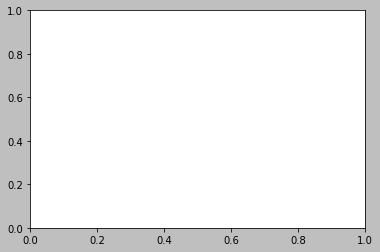

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) # suplot 추가 가능
#ax.yaxis.tick_right() # 축을 오른쪽에 표현하고자 할 때, 사용 가능

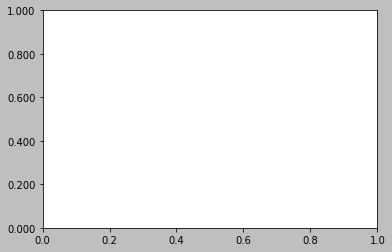

In [14]:
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.3f')) # 축의 수치를 소수점 셋째자리까지 표현
fig

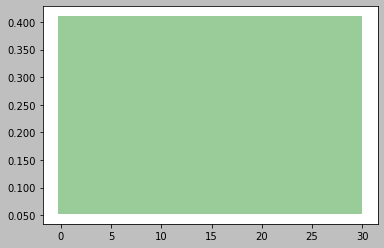

In [15]:

ax.fill_between([-0.3, num], [lcl, lcl], [ucl, ucl], facecolor='green', alpha=0.4) # 영역 색 표시
fig

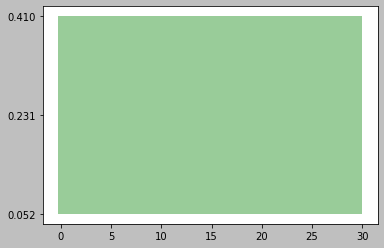

In [16]:
ax.yaxis.set_ticks([lcl, center, ucl]) # ULC, CL, LCL의 수치만을 표현하도록 설정
fig

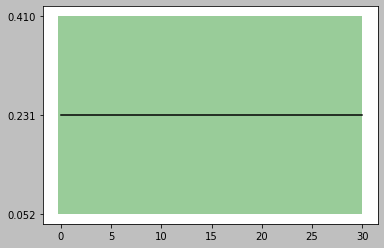

In [17]:
ax.plot([0, num], [center, center], 'k-') # Center (CL, p bar) 표시
fig

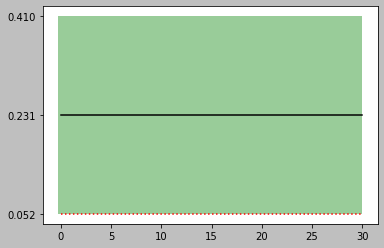

In [18]:
ax.plot([0, num], [lcl, lcl], 'r:') # LCL 붉은 점선으로 표시
fig

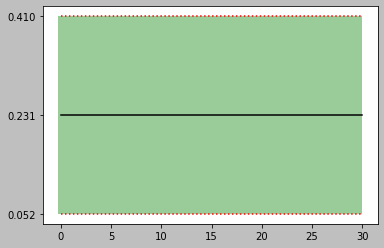

In [19]:
ax.plot([0, num], [ucl, ucl], 'r:') # UCL 붉은 점선으로 표시
fig

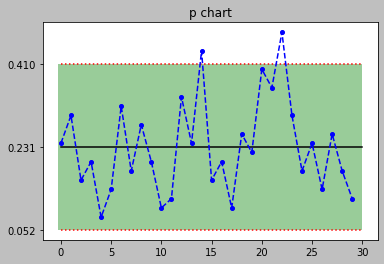

In [20]:
ax.plot(values, 'bo--') # 측정값을 파란색으로 plotting
ax.set_title(title)
fig

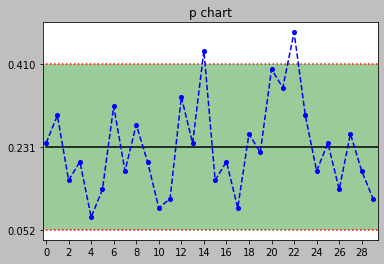

In [21]:
# X 축 설정 변경
new_xlim = [0, num]
ax.set_xlim([0, num] + np.array((-0.3, -0.6)))
ax.xaxis.set_ticks(np.arange(*new_xlim, 2))
fig

## (2) Simulation Data 활용하여 "p chart" Fitting

In [22]:
# Simulation data 생성

np.random.seed(3)

n = 500
m = 30

p_train = {'nonconforming':np.random.randint(1,10,m).tolist(), 
           'sample_size':n}
p_test = {'nonconforming':np.random.randint(1,10,10).tolist(), 
          'sample_size':n}

idx = np.random.choice(30, 3, False)  # 이상 데이터 설정
for i in idx: 
    p_train['nonconforming'][i] = p_train['nonconforming'][i] + 10
    
idx = np.random.choice(10, 2, False)  # 이상 데이터 설정
for i in idx: 
    p_test['nonconforming'][i] = p_test['nonconforming'][i] + 10

In [23]:
# Dataframe 형태 변환
p_train = pd.DataFrame(p_train)
p_test = pd.DataFrame(p_test)

# probability data 변환 (=값/빈도수)
p_train['p'] = p_train['nonconforming']/p_train['sample_size']
p_test['p'] = p_test['nonconforming']/p_test['sample_size']

In [24]:
p_train.head()

,nonconforming,sample_size,p
0,9,500,0.018
1,4,500,0.008
2,9,500,0.018
3,9,500,0.018
4,1,500,0.002


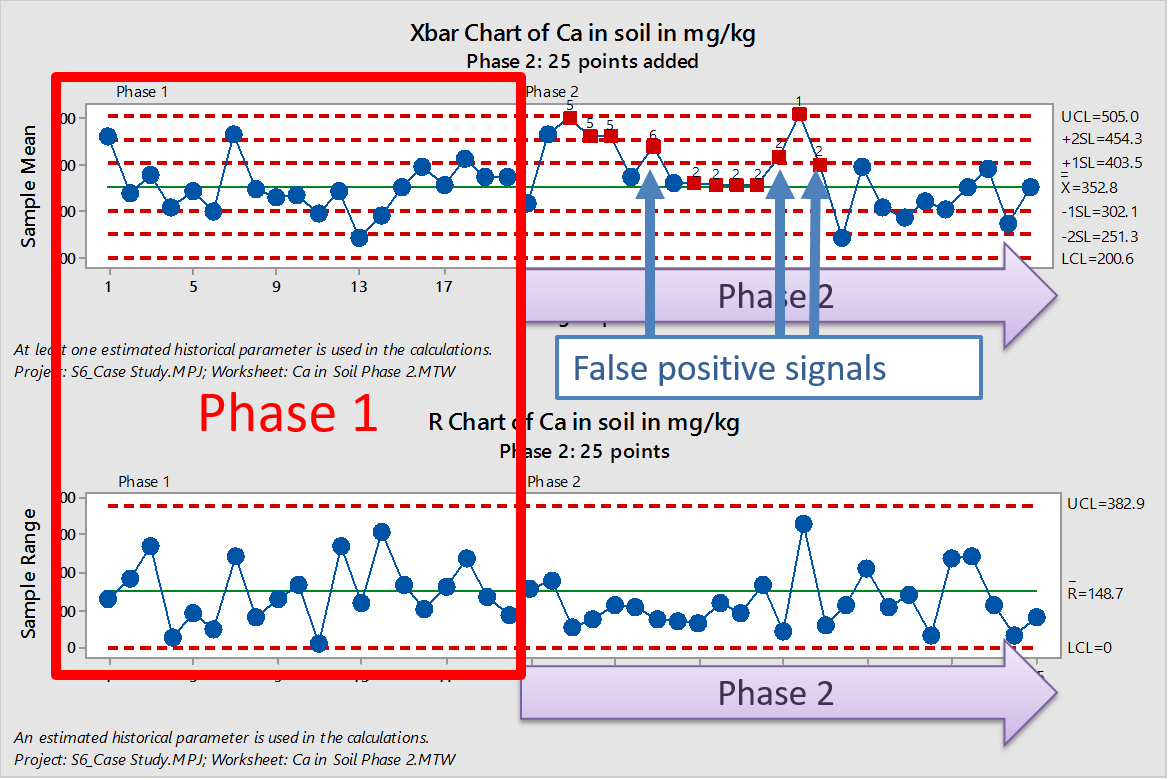

> Phase I

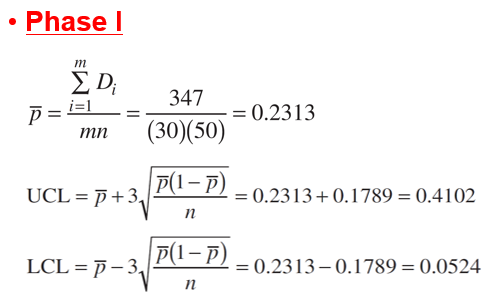

In [25]:
# p bar 계산
p_bar = np.sum(p_train['nonconforming'])/(m*n)
print(f'P bar = {p_bar:.4f}')

# UCL, LCL 계산
UCL = p_bar + 3 * np.sqrt((p_bar * (1-p_bar)) / n)  
LCL = p_bar - 3 * np.sqrt((p_bar * (1-p_bar)) / n)  
print(f'UCL = {UCL:.4f}\t\tLCL = {LCL:.4f}')

if UCL > 1:
    UCL = 1
if LCL < 0:
    LCL = 0

print(f'Trial UCL = {UCL:.4f}\tTrial LCL = {LCL:.4f}')

P bar = 0.0129
UCL = 0.0281		LCL = -0.0022
Trial UCL = 0.0281	Trial LCL = 0.0000


In [26]:
# Phase I 단계에서 Control Limit을 벗어나는 점 확인 후, Control Limit 내 점에 대해서만 s1 변수에 저장

p_train['s1'] = (p_train['p'] > LCL) & (p_train['p'] < UCL)
print('1st Trial Control Limit을 벗어나는 샘플 인덱스: {}'.format(list(p_train['s1'][p_train['s1'] == 0].index)))

1st Trial Control Limit을 벗어나는 샘플 인덱스: [20, 23]


In [27]:
p_train

,nonconforming,sample_size,p,s1
0,9,500,0.018,True
1,4,500,0.008,True
2,9,500,0.018,True
3,9,500,0.018,True
4,1,500,0.002,True
5,6,500,0.012,True
6,4,500,0.008,True
7,6,500,0.012,True
8,8,500,0.016,True
9,7,500,0.014,True


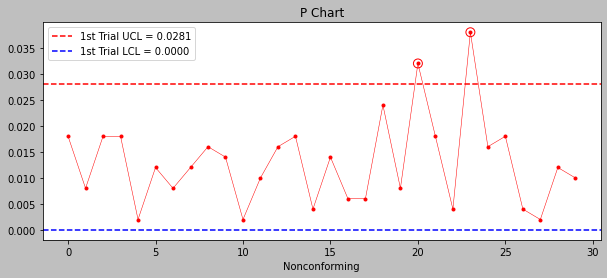

In [28]:
# Phase I 단계의 p chart plotting

plt.figure(figsize = (10,4))
plt.plot(p_train['p'], marker='o', color='r', markersize=3, linewidth=0.5)
plt.scatter(p_train['s1'][p_train['s1'] == 0].index, 
            p_train['p'][p_train['s1'][p_train['s1'] == 0].index], 
            s=80, facecolors='none', edgecolors='r')

plt.axhline(UCL, color='r', label=f'1st Trial UCL = {UCL:.4f}', linestyle='--')
plt.axhline(LCL, color='b', label=f'1st Trial LCL = {LCL:.4f}', linestyle='--')
plt.legend()
plt.title(f'P Chart')
plt.xlabel('Nonconforming')
plt.show()

In [31]:
# Control Limit을 넘어가는 [20, 23] 인덱스를 제외하고 Control Limit 다시 계산

p_bar = np.sum(p_train[p_train['s1'] == 1]['nonconforming'])/((m-2)*n)
print(f'P bar = {p_bar:.4f}')

UCL = p_bar + 3 * np.sqrt((p_bar * (1-p_bar)) / n)  
LCL = p_bar - 3 * np.sqrt((p_bar * (1-p_bar)) / n)  
print(f'UCL = {UCL:.4f}\t\tLCL = {LCL:.4f}')

if UCL > 1:
    UCL = 1
if LCL < 0:
    LCL = 0

print(f'Trial UCL = {UCL:.4f}\tTrial LCL = {LCL:.4f}')

P bar = 0.0114
UCL = 0.0256		LCL = -0.0029
Trial UCL = 0.0256	Trial LCL = 0.0000


In [32]:
p_train2 = p_train.copy()
p_train2 = p_train2.loc[p_train2['s1'] == True]
p_train2

,nonconforming,sample_size,p,s1
0,9,500,0.018,True
1,4,500,0.008,True
2,9,500,0.018,True
3,9,500,0.018,True
4,1,500,0.002,True
5,6,500,0.012,True
6,4,500,0.008,True
7,6,500,0.012,True
8,8,500,0.016,True
9,7,500,0.014,True


In [33]:
p_train2['s2'] = (p_train2['p'] > LCL) & (p_train2['p'] < UCL)
print('2nd Trial Control Limit을 벗어나는 샘플 인덱스: {}'.format(list(p_train2['s2'][p_train2['s2'] == 0].index)))

2nd Trial Control Limit을 벗어나는 샘플 인덱스: []


In [34]:
p_train2

,nonconforming,sample_size,p,s1,s2
0,9,500,0.018,True,True
1,4,500,0.008,True,True
2,9,500,0.018,True,True
3,9,500,0.018,True,True
4,1,500,0.002,True,True
5,6,500,0.012,True,True
6,4,500,0.008,True,True
7,6,500,0.012,True,True
8,8,500,0.016,True,True
9,7,500,0.014,True,True


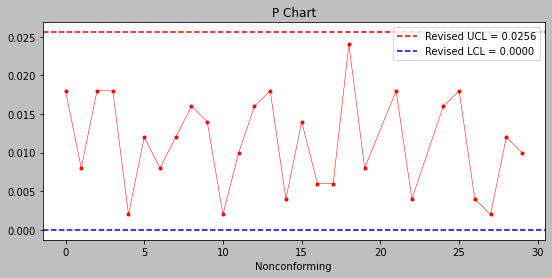

In [35]:
# Control Limit을 넘어가는 [20, 23] 인덱스를 제외하고 p chart plotting
# 모든 Phase I sample이 Control Limit 내에 위치함을 확인

plt.figure(figsize = (9,4))
plt.plot(p_train2['p'], marker='o', color='r', markersize=3, linewidth=0.5)
plt.scatter(p_train2['s2'][p_train2['s2'] == 0].index, 
            p_train2['p'][p_train2['s2'][p_train2['s2'] == 0].index], 
            s=80, facecolors='none', edgecolors='r')
plt.axhline(UCL, color='r', label=f'Revised UCL = {UCL:.4f}', linestyle='--')
plt.axhline(LCL, color='b', label=f'Revised LCL = {LCL:.4f}', linestyle='--')
plt.legend()
plt.title(f'P Chart')
plt.xlabel('Nonconforming')
plt.show()

> Phase II

In [36]:
p_test.head()

,nonconforming,sample_size,p
0,2,500,0.004
1,6,500,0.012
2,5,500,0.010
3,8,500,0.016
4,7,500,0.014


In [37]:
p_test['detected'] = (p_test['p']>LCL) & (p_test['p']<UCL)
print('Revised Control Limit을 벗어나는 샘플 인덱스: {}'.format(list(p_test['detected'][p_test['detected'] == 0].index)))

Revised Control Limit을 벗어나는 샘플 인덱스: [9]


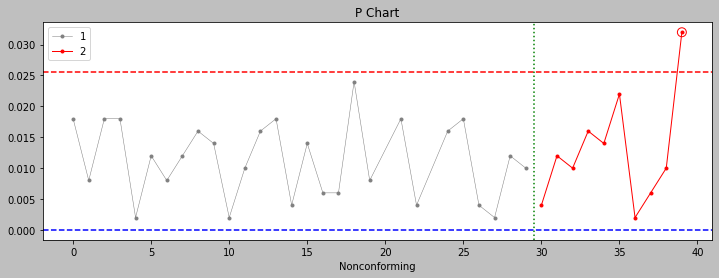

In [40]:
# Test data에 대해 p chart plotting

plt.figure(figsize = (12,4))
plt.plot(p_train2['p'], marker='o', color='grey', markersize=3, linewidth=0.5)
plt.plot(p_test.index+30, p_test['p'], marker='o', color='red', markersize=3, linewidth=1.0)
plt.scatter(p_train2['s1'][p_train2['s1'] == 0].index, 
            p_train2['p'][p_train2['s1'][p_train2['s1'] == 0].index], 
            s=80, facecolors='none', edgecolors='grey')
plt.scatter(p_test['detected'][p_test['detected'] == 0].index+30, 
            p_test['p'][p_test['detected'][p_test['detected'] == 0].index], 
            s=80, facecolors='none', edgecolors='red')

plt.axhline(UCL, color='r', label=f'Revised UCL = {UCL:.4f}', linestyle='--')
plt.axhline(LCL, color='b', label=f'Revised LCL = {LCL:.4f}', linestyle='--')
plt.axvline(29.5, color='green', linestyle=':')
plt.legend('12')
plt.title(f'P Chart')
plt.xlabel('Nonconforming')
plt.show()